## MSDS670 - Week5 - MATPLOTLIB Visualizations - Chris Green

### Importing Packages and Initial Data
Note: Much of the data cleaning and prep was done in Excel before importing to Jupyter

In [1]:
conda install -c conda-forge pandas pandas-profiling matplotlib openpyxl -y

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import phik
import seaborn as sns

In [3]:
df = pd.read_excel('50 richest people 2021.xlsx', header=0, usecols = "A:G")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        50 non-null     int64  
 1   Name                        50 non-null     object 
 2   Total Net Worth             50 non-null     float64
 3   $ YTD Change (in Billions)  50 non-null     float64
 4   Country                     50 non-null     object 
 5   Industry                    50 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.5+ KB


### Horizontal Bar Showing the Industry Sectors for 50 Richest

In [5]:
df_industry = pd.read_excel('50 Richest Industry Count.xlsx', header=0, usecols = "A:B")

In [6]:
df_industry_sorted= df_industry.sort_values('Count',ascending=True)

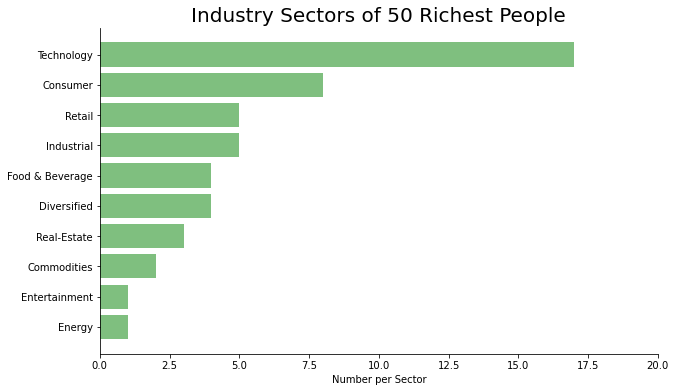

<Figure size 720x432 with 0 Axes>

In [7]:
fig, ax= plt.subplots(figsize=(10,6))
plt.figure(figsize=(10,6))
ax.barh('Industry', 'Count',data=df_industry_sorted, color='green', alpha=0.5)
ax.set(xlim=[0, 20], xlabel='Number per Sector', ylabel='')
ax.set_title('Industry Sectors of 50 Richest People', loc='center', fontsize=20)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side.set_visible(False)
plt.savefig("Industry_barplot.png")

### Horizontal Bar Showing 50 Richest

In [8]:
df_sorted= df.sort_values('Total Net Worth',ascending=True)

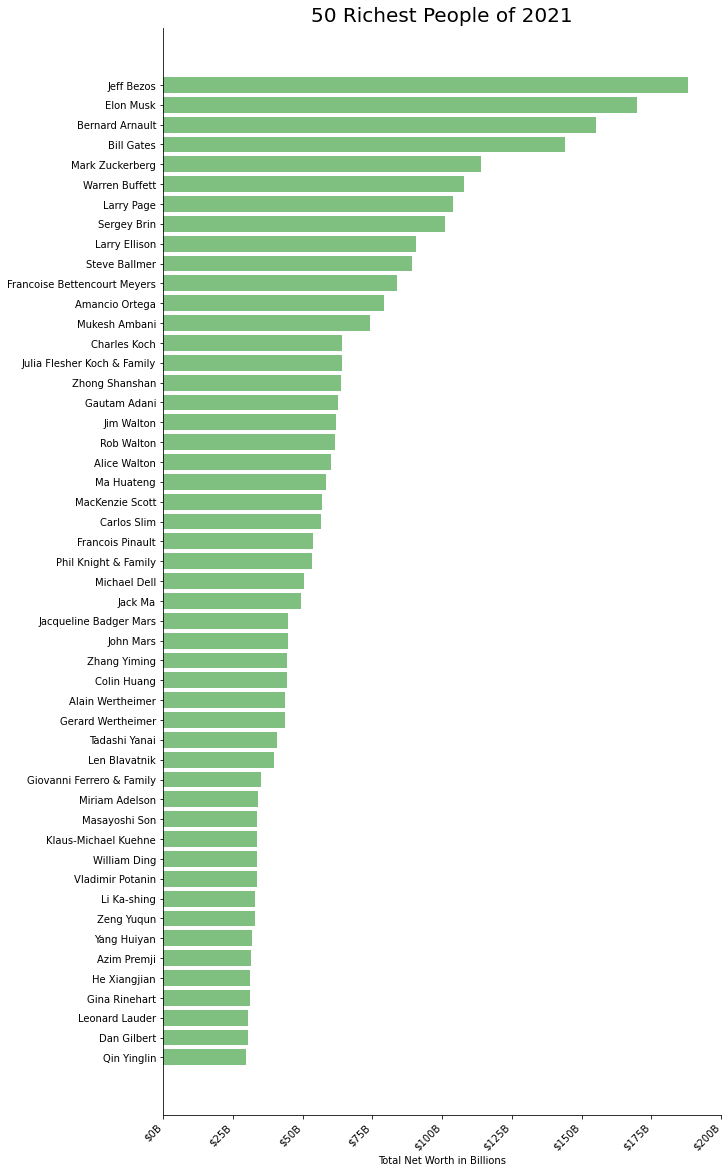

In [9]:
fig, ax = plt.subplots(figsize=(10, 20))
ax.barh('Name', 'Total Net Worth',data=df_sorted, color='green', alpha=0.5)
labels = ax.get_xticklabels()
plt.setp(labels,rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 200], xlabel='Total Net Worth in Billions', ylabel='')
ax.set_title('50 Richest People of 2021', loc='center', fontsize=20)
ax.xaxis.set_major_formatter('${x:1.0f}B')
right_side = ax.spines["right"]
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side.set_visible(False)
plt.savefig("50_barplot.png")

### Horizontal Bar Delineating YTD Gains and Losses By Bar Direction and Color

In [10]:
winloss= df.sort_values('$ YTD Change (in Billions)',ascending=True)

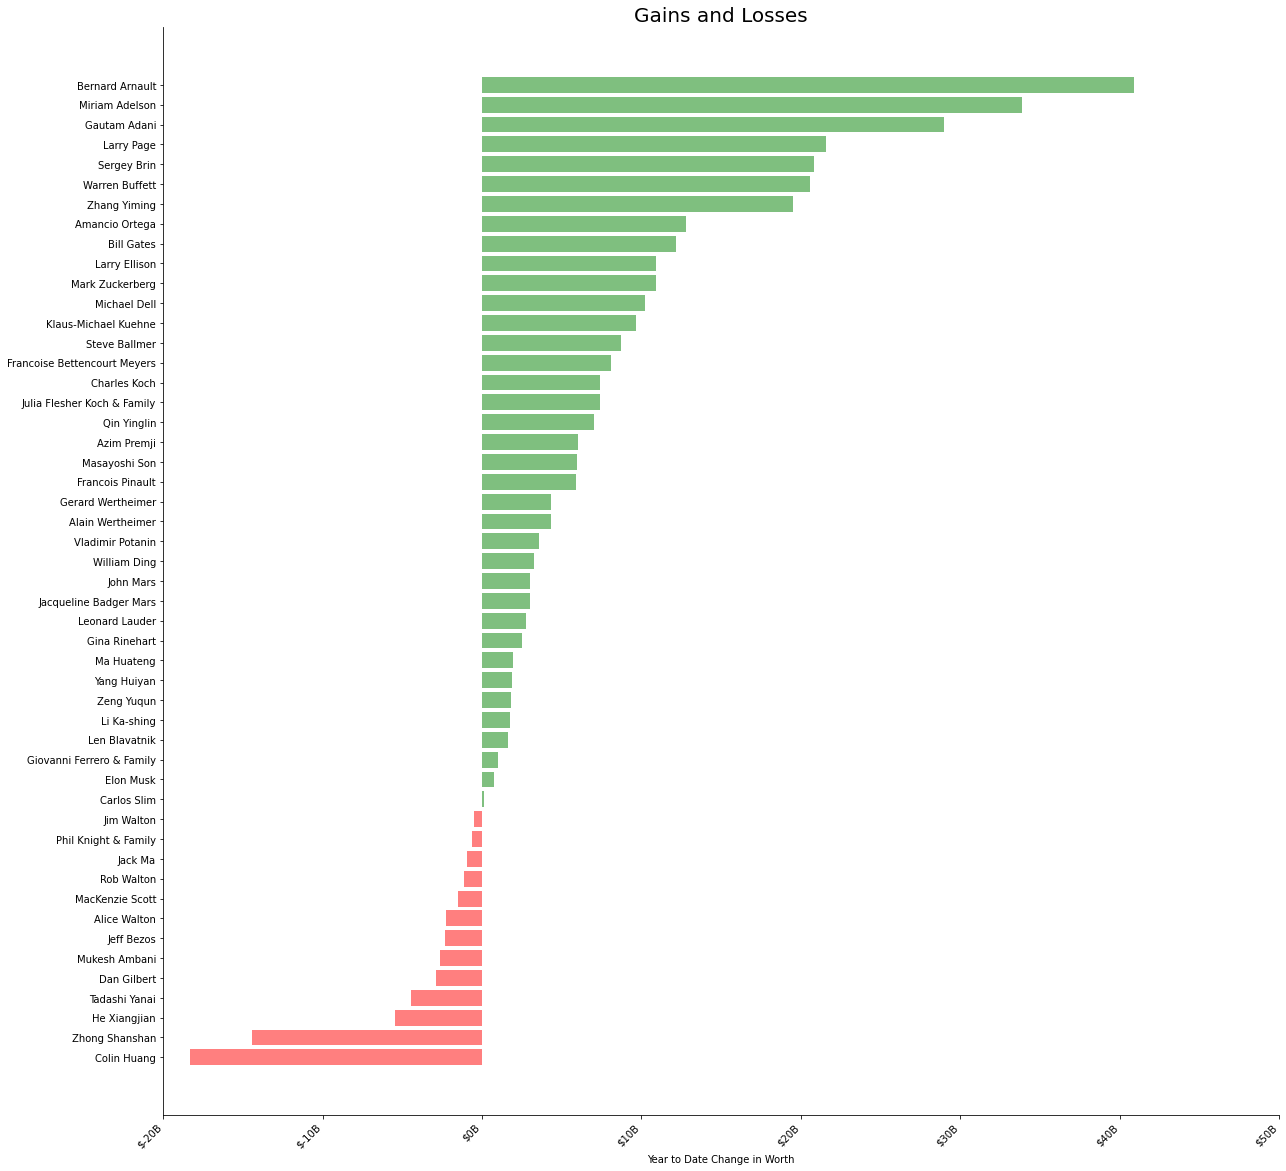

In [11]:
import numpy as np
x=winloss['$ YTD Change (in Billions)']
fig, ax = plt.subplots(figsize=(20, 20))
my_color = np.where(x<0, 'red', 'green')
ax.barh(winloss['Name'],winloss['$ YTD Change (in Billions)'],color=my_color, alpha=0.5)
labels = ax.get_xticklabels()
plt.setp(labels,rotation=45, horizontalalignment='right')
ax.set(xlim=[-20, 50], xlabel='Year to Date Change in Worth', ylabel='')
ax.set_title('Gains and Losses', loc='center', fontsize=20)
ax.xaxis.set_major_formatter('${x:1.0f}B')
right_side = ax.spines["right"]
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side.set_visible(False)
plt.savefig("WinLoss_barplot.png")

### Scatter Plot Showing Distribution of Gains and Losses by Net Worth for 500 Richest

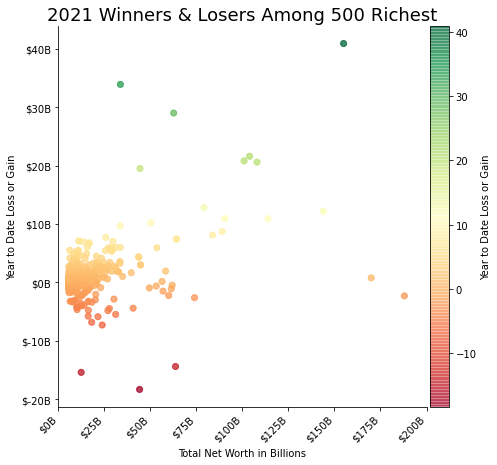

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

df500 = pd.read_excel('500 richest people 2021.xlsx', header=0, usecols = "A:G")


fig, ax = plt.subplots(figsize=(7, 7))
x = df500['Total Net Worth']
y = df500['$ YTD Change (in Billions)']
c = df500['$ YTD Change (in Billions)']

scat = ax.scatter(x,y, c=c, cmap = 'RdYlGn', alpha=0.5)

ax.scatter(x,y, c=c, cmap = 'RdYlGn', alpha=0.5)

labels = ax.get_xticklabels()
plt.setp(labels,rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 200], xlabel='Total Net Worth in Billions', ylabel='Year to Date Loss or Gain')
ax.set_title('2021 Winners & Losers Among 500 Richest', loc='center', fontsize=18)
ax.xaxis.set_major_formatter('${x:1.0f}B')
ax.yaxis.set_major_formatter('${x:1.0f}B')

right_side = ax.spines["right"]
top_side = ax.spines["top"]
top_side.set_visible(False)
right_side.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(scat, cax=cax, label='Year to Date Loss or Gain')

plt.savefig("500_scarplot.png")